In [11]:
import os, json
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='arial')

In [1]:
##### Input file name
fn_fp_list = ['fp', 'fn']
rup_ind_list = [0, 0, 0, 0]
source_ind_list = [83, 108, 606, 626]
fileName = ['sim_s5_'+i+'_ucerf3_'+str(rup_ind_list[j])+'_'+str(source_ind_list[j])+'_rr.out' for j in range(len(source_ind_list)) for i in fn_fp_list]
filePath = [os.getcwd()+'\\output\\'+i for i in fileName]
file_dict = {i+2*j: {'source': source_ind_list[j],
                     'orient': fn_fp_list[i]}
                     for j in range(len(source_ind_list)) for i in range(len(fn_fp_list))}
saveDir = '\\output\\'

NameError: name 'os' is not defined

In [3]:
file_dict

{0: {'source': 83, 'orient': 'fp'},
 1: {'source': 83, 'orient': 'fn'},
 2: {'source': 108, 'orient': 'fp'},
 3: {'source': 108, 'orient': 'fn'},
 4: {'source': 606, 'orient': 'fp'},
 5: {'source': 606, 'orient': 'fn'},
 6: {'source': 626, 'orient': 'fp'},
 7: {'source': 626, 'orient': 'fn'}}

In [4]:
# Plot the surface.
# pga = A._DM_dict['site_1']['pga']
# pgv = A._DM_dict['site_1']['pgv']
# rr_pgd = A._DM_dict['site_1']['rr_pgd']
# rr_pgv = A._DM_dict['site_1']['rr_pgv']
# rr_leak = A._DM_dict['site_1']['rr_leak']
# rr_break = A._DM_dict['site_1']['rr_break']

In [9]:
fileName_rates = ['sim_s5_'+i+'_ucerf3_'+str(rup_ind_list[j])+'_'+str(source_ind_list[j])+'_out.json' for j in range(len(source_ind_list)) for i in fn_fp_list]
filePath_rates = [os.getcwd()+'\\output\\'+i for i in fileName_rates]
fileName_rates

['sim_s5_fp_ucerf3_0_83_out.json',
 'sim_s5_fn_ucerf3_0_83_out.json',
 'sim_s5_fp_ucerf3_0_108_out.json',
 'sim_s5_fn_ucerf3_0_108_out.json',
 'sim_s5_fp_ucerf3_0_606_out.json',
 'sim_s5_fn_ucerf3_0_606_out.json',
 'sim_s5_fp_ucerf3_0_626_out.json',
 'sim_s5_fn_ucerf3_0_626_out.json']

In [13]:
rates = []
for i in filePath_rates:
    with open(i, 'r') as f:
        jd = json.load(f)
    rates.append(jd['EqRupture']['MeanAnnualRate'])
rates

[9.84414685118607e-09,
 9.84414685118607e-09,
 5.919705646890944e-09,
 5.919705646890944e-09,
 1.244999503973443e-08,
 1.244999503973443e-08,
 3.7752646352867894e-09,
 3.7752646352867894e-09]

In [51]:
ind = 7
file = np.transpose(np.loadtxt(filePath[ind]))
rup_ind = str(file_dict[ind]['source'])
fn_fp = file_dict[ind]['orient']

pga = file[0:5]
pgv = file[5:10]
rr_pgv = file[10:15]
rr_pgd = file[15:20]
rr_leak = file[20:25]
rr_break = file[25:30]

In [50]:
E_leak = [rates[ind]*sum(i)/len(i) for i in rr_leak]
E_break = [rates[ind]*sum(i)/len(i) for i in rr_break]
E_leak_avg = sum(E_leak)/len(E_leak)
E_break_avg = sum(E_break)/len(E_break)
print(E_leak)
print(E_break)
print(E_leak_avg)
print(E_break_avg)

[9.554927653052751e-09, 1.5146865071671775e-08, 2.2101669393712563e-08, 2.184421563039288e-08, 9.037057720424494e-09]
[2.677413645097605e-09, 3.7867162961380575e-09, 5.907929864931193e-09, 5.461053884569087e-09, 2.2592644242544605e-09]
1.5536947093850895e-08
4.0184756229980805e-09


In [32]:
sum(rr_leak[0])/len(rr_leak[0])*rates[ind]

4.799146641228669e-08

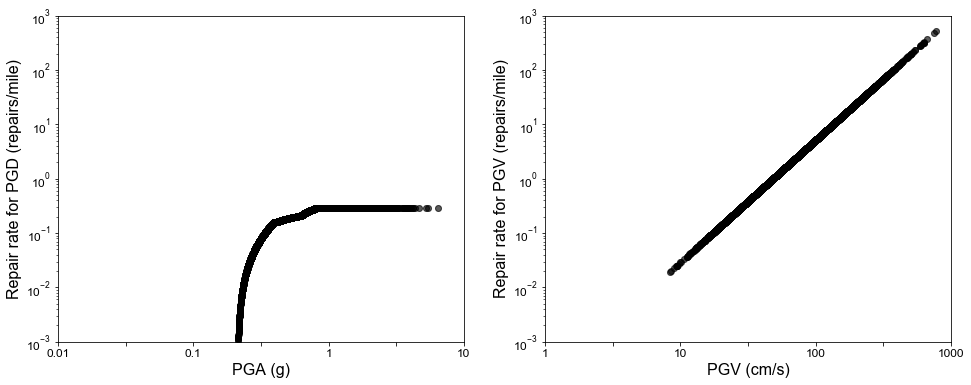

In [18]:
nx = 1
ny = 2
figsize = (16,12/2)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
# fig.subplots_adjust(wspace=0.4)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
ylims = [0.001,1000]
ytickslabel = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
case = 2

##
for i in range(ny):
    if i == 0:
        y = rr_pgd[0]*1.60937
        ylabel = 'Repair rate for PGD (repairs/mile)'
#         ylims = [-0.025,0.325]
        x = pga[0]
        xlabel = 'PGA (g)'
        xticks = [0.01,10**(-1.5),0.1,10**(-0.5),1,10**(0.5),10]
        xtickslabel = [0.01,None,0.1,None,1,None,10]
        xlims = np.log10([0.01,10])
    elif i == 1:
        y = rr_pgv[0]*1.60937
        ylabel = 'Repair rate for PGV (repairs/mile)'
#         ylims = [-25,525]
        x = pgv[0]
        xlabel = 'PGV (cm/s)'
        xticks = [1,10**(0.5),10,10**(1.5),100,10**(2.5),1000]
        xtickslabel = [1,None,10,None,100,None,1000]
        xlims = np.log10([1,1000])

    if case == 1:
        ax[i].scatter(np.log10(x),y,ec='None',fc='None')
        ax[i].scatter(np.log10(x),y,ec='None',fc='None')

    elif case == 2:
        ax[i].scatter(np.log10(x),y,ec='k',fc='k',alpha=0.4)
        ax[i].scatter(np.log10(x),y,ec='k',fc='k',alpha=0.4)
        
    ax[i].set_xlim(xlims)
    ax[i].set_ylim(ylims)
    ax[i].set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
    ax[i].set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
    ax[i].set_xticks(np.log10(xticks))
#         ax.set_xticks(np.log10(xticks))
    ax[i].set_xticklabels(xtickslabel,fontname=fontname)
#         ax[i][j].set_yticklabels(ax[i][j].get_yticklabels(),fontname=fontname)
    ax[i].tick_params(labelsize=fontsize_axis)
    ax[i].set_yscale('log')
        
if case == 1:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rr_im_empty.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rr_im_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()

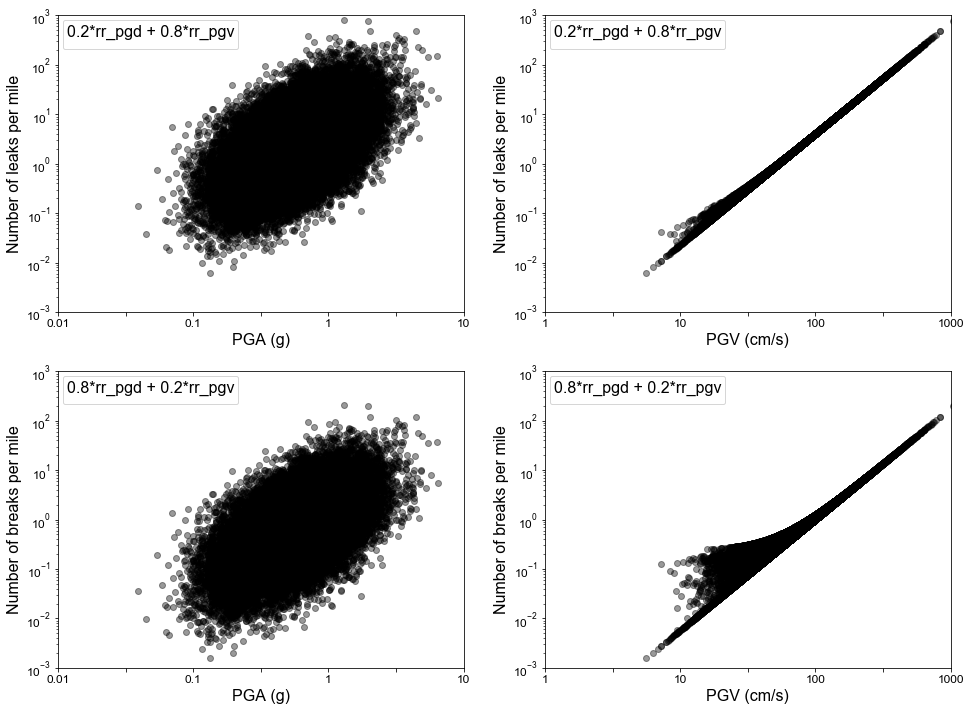

In [19]:
nx = 2
ny = 2
figsize = (16,12)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
ylims = [0.001,1000]
case = 3

##
for i in range(nx):
    if i == 0:
        y = rr_leak*1.60937
        ylabel = 'Number of leaks per mile'
        lgtitle = '0.2*rr_pgd + 0.8*rr_pgv'
    elif i == 1:
        y = rr_break*1.60937
        ylabel = 'Number of breaks per mile'
        lgtitle = '0.8*rr_pgd + 0.2*rr_pgv'
        
    for j in range(nx):
        if j == 0:
            x = pga
            xlabel = 'PGA (g)'
            xticks = [0.01,10**(-1.5),0.1,10**(-0.5),1,10**(0.5),10]
            xtickslabel = [0.01,None,0.1,None,1,None,10]
            xlims = np.log10([0.01,10])
        elif j == 1:
            x = pgv
            xlabel = 'PGV (cm/s)'
            xticks = [1,10**(0.5),10,10**(1.5),100,10**(2.5),1000]
            xtickslabel = [1,None,10,None,100,None,1000]
            xlims = np.log10([1,1000])
            
        if case == 1:
            ax[i][j].scatter(np.log10(x),y,ec='None',fc='None')
        
        elif case == 2:
            if (i == 0 and j == 0) or (i == 1 and j == 1):
                ax[i][j].scatter(np.log10(x),y,ec='k',fc='k',alpha=0.4)
            
        elif case == 3:
            ax[i][j].scatter(np.log10(x),y,ec='k',fc='k',alpha=0.4)
        
        ax[i][j].legend('',title=lgtitle,title_fontsize=fontsize_label,loc=2)
        ax[i][j].set_xlim(xlims)
        ax[i][j].set_ylim(ylims)
        ax[i][j].set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
        ax[i][j].set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
        ax[i][j].set_xticks(np.log10(xticks))
        ax[i][j].set_xticklabels(xtickslabel,fontname=fontname)
#         ax[i][j].set_yticklabels(ax[i][j].get_yticklabels(),fontname=fontname)
        ax[i][j].tick_params(labelsize=fontsize_axis)
        ax[i][j].set_yscale('log')
    
if case == 1:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rr_leak_break_empty.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rr_leak_break_1_4.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 3:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rr_leak_break_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()